In [1]:
# Import packages
import scanpy as sc
import numpy as np

In [28]:
# Variables
file = "../data/BCB/full.h5ad"
hlca_file = "../data/HLCA/core.h5ad"

In [84]:
# Read data
ds = sc.read(file)
ds

AnnData object with n_obs × n_vars = 320709 × 36601
    obs: 'sample_id', 'libname', 'sample', 'cohort', 'lane', 'index', 'TotalSeq.A', 'Chemistry', 'run', 'frozen', 'freeze_method', 'virus_SCoV2', 'virus_HSV.1', 'virus_CMV', 'virus_HHV6A', 'virus_HHV6B', 'hto_clust', 'libsize', 'nfeatures', 'percent.mt', 'qc_linear', 'qc_adaptive', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'seurat2000', 'seurat5000'
    uns: 'hvg', 'hvg_keys', 'log1p'
    obsm: 'X_seurat2000_fastMNN_n10k10', 'X_seurat2000_fastMNN_n30k10', 'X_seurat2000_fastMNN_n50k10', 'X_seurat5000_fastMNN_n10k10', 'X_seurat5000_fastMNN_n30k10', 'X_seurat5000_fastMNN_n50k10', 'counts_seurat2000_scVI_n10l1h128', 'counts_seurat2000_scVI_n30l1h128', 'counts_seurat2000_scVI_n50l1h128', 'counts_seurat5000_scVI_n10l1h128', 'counts_seurat5000_scVI_n30l1h128', 'counts_seurat5000_scVI_n50l1h128', 'cp10k_seur

In [29]:
# Load HLCA
hlca = sc.read(hlca_file)

/home/odietric/miniconda3/envs/covid19-bal-atlas-integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


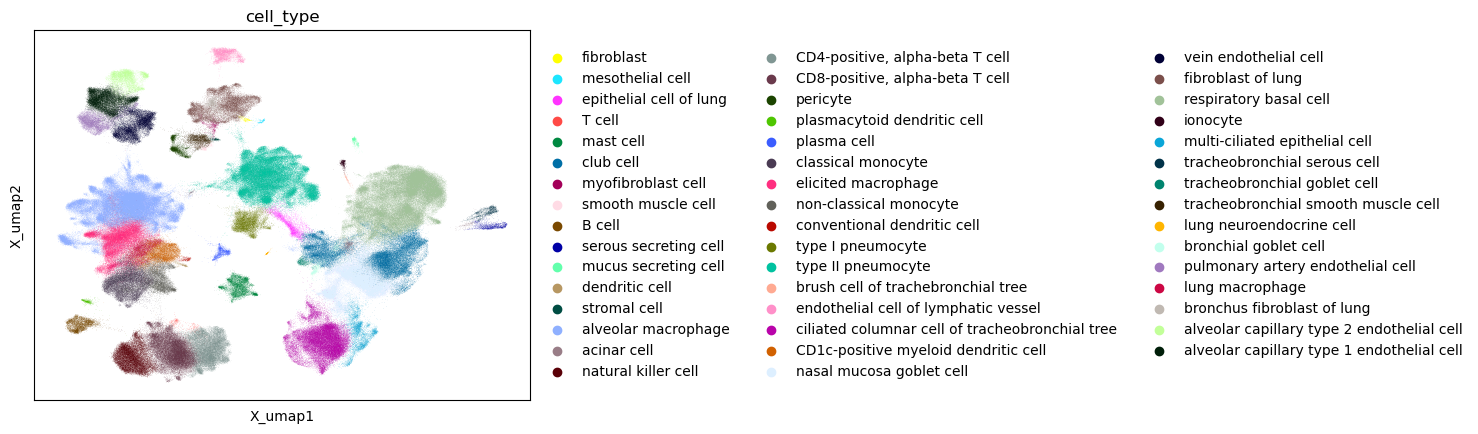

In [35]:
# Show reference map
sc.pl.embedding(hlca, basis="X_umap", color="cell_type")

In [9]:
# Compute UMAP
sc.pp.neighbors(ds, use_rep="counts_seurat2000_scVI_n30l1h128")
sc.tl.umap(ds)

In [16]:
# Put normalized (cp10k) counts in X
ds.X = ds.layers["cp10k"]

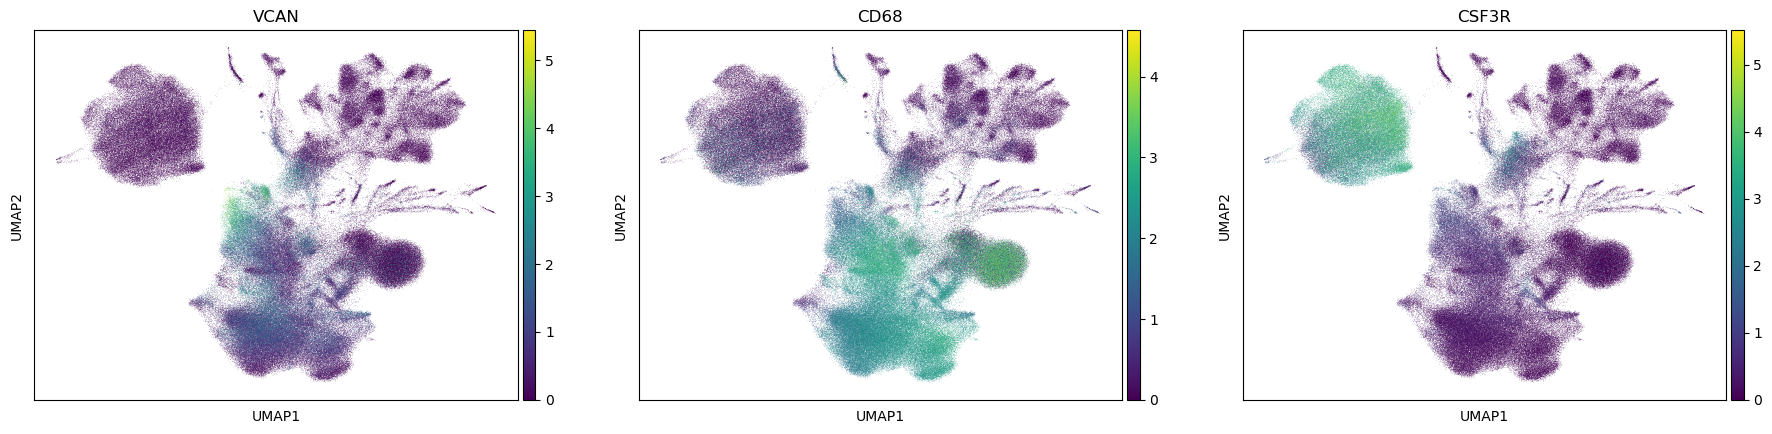

In [25]:
# Show marker genes
sc.pl.umap(ds, color=["VCAN", "CD68", "CSF3R"])

In [58]:
hlca.var.index = hlca.var.feature_name.values
hlca.var

,n_cells,highly_variable,means,dispersions,feature_is_filtered,feature_name,feature_reference,feature_biotype
TSPAN6,106120,False,0.172146,0.962372,False,TSPAN6,NCBITaxon:9606,gene
TNMD,305,False,0.000224,0.701593,False,TNMD,NCBITaxon:9606,gene
DPM1,140518,False,0.207243,0.859629,False,DPM1,NCBITaxon:9606,gene
SCYL3,31464,False,0.034430,0.925702,False,SCYL3,NCBITaxon:9606,gene
C1orf112,10484,False,0.011548,0.960026,False,C1orf112,NCBITaxon:9606,gene
...,...,...,...,...,...,...,...,...
RP11-11M20.4,2701,False,0.002350,0.955800,False,RP11-11M20.4,NCBITaxon:9606,gene
LLNLR-245B6.1,73401,False,0.093291,0.910759,False,LLNLR-245B6.1,NCBITaxon:9606,gene
MGC4859,131,False,0.000159,0.410029,False,MGC4859,NCBITaxon:9606,gene
RP11-107E5.4,22,False,0.000028,0.631858,False,RP11-107E5.4,NCBITaxon:9606,gene


KeyError: 'TNMD'

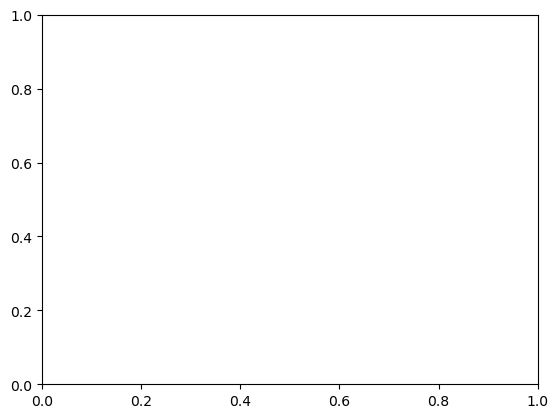

In [85]:
sc.pl.embedding(hlca, basis="X_umap", color=["TNMD"])

In [83]:
ds.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1',
       ...
       'AC133551.1', 'AC136612.1', 'AC136616.1', 'AC136616.3', 'AC136616.2',
       'AC141272.1', 'AC023491.2', 'AC007325.1', 'AC007325.4', 'AC007325.2'],
      dtype='object', length=36601)